<a href="https://colab.research.google.com/github/anvicoder/K-Means-Clustering/blob/main/Resolute_Ai_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('train.xlsx')
print(df)

       T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  \
0     -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75   
1     -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63   
2     -53 -38 -55 -66 -62 -62 -65 -70 -62  -52  -56  -53  -66  -68  -72  -60   
3     -72 -62 -59 -65 -65 -65 -78 -82 -83  -59  -84  -60  -64  -83  -69  -72   
4     -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
36747 -68 -62 -64 -59 -59 -71 -67 -73 -73  -69  -71  -75  -56  -68  -68  -75   
36748 -56 -50 -57 -50 -59 -60 -62 -69 -58  -64  -49  -61  -58  -56  -60  -58   
36749 -42 -58 -72 -70 -75 -72 -76 -84 -84  -59  -65  -68  -65  -81  -86  -70   
36750 -50 -50 -70 -64 -64 -68 -68 -73 -79  -58  -61  -73  -67  -77  -73  -74   
36751 -66 -64 -70 -62 -59 -62 -53 -58 -64  -80  -73  -83  -67  -61  -56  -61   

       T17  T18 target  
0      -63  -7

In [ ]:
features = ["T1","T2","T3","T4","T5","T6","T7","T8","T9","T10","T11","T12","T13","T14","T15","T16", "T17", "T18"]

In [ ]:
df = df.dropna(subset = features)

In [ ]:
data = df[features].copy()

In [ ]:
data

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,-71,-75,-56,-68,-68,-75,-75,-95
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,-49,-61,-58,-56,-60,-58,-59,-64
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,-65,-68,-65,-81,-86,-70,-75,-74
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,-61,-73,-67,-77,-73,-74,-72,-81


In [ ]:
data = ((data-data.min()) / (data.max()- data.min())) * 9 + 1 #1-10 scale
data.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,5.144242,5.270644,4.929079,5.226219,5.341684,4.908367,4.965436,5.434310,5.289863,5.430976,5.202496,5.023035,4.628145,5.081995,5.192107,4.949655,4.965318,5.434174
std,1.456214,1.383294,1.359086,1.308665,1.230769,1.390420,1.666355,1.632888,1.703290,1.615057,1.547011,1.534541,1.428614,1.536885,1.453791,1.724816,1.743226,1.703731
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.333333,4.413793,4.000000,4.535714,4.508475,3.892857,3.700000,4.214286,4.053571,4.258621,4.109091,4.115385,3.596154,4.053571,4.157895,3.781818,3.769231,4.214286
50%,5.166667,5.344828,4.833333,5.339286,5.423729,4.857143,4.780000,5.339286,5.178571,5.344828,5.090909,4.980769,4.461538,5.017857,5.263158,4.763636,4.807692,5.339286
75%,6.166667,6.120690,5.833333,5.982143,6.033898,5.821429,6.220000,6.785714,6.464286,6.586207,6.072727,6.019231,5.500000,5.982143,6.052632,6.072727,6.019231,6.625000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,5.833333,4.724138,5.166667,3.250000,3.288136,4.857143,7.66,3.892857,6.946429,7.362069,5.254545,4.980769,4.115385,4.214286,6.526316,6.727273,4.461538,7.107143
1,7.000000,6.741379,6.000000,6.946429,5.423729,4.857143,4.78,3.089286,3.571429,6.896552,6.236364,6.538462,6.365385,4.535714,5.105263,4.763636,2.730769,4.857143
2,3.000000,1.155172,3.333333,5.339286,4.966102,4.696429,4.60,5.982143,4.696429,3.327586,3.618182,2.730769,4.980769,5.660714,6.368421,4.272727,5.326923,7.107143
3,6.166667,4.879310,4.000000,5.178571,5.423729,5.178571,6.94,7.910714,8.071429,4.413793,8.200000,3.942308,4.634615,8.071429,5.894737,6.236364,10.000000,6.464286
4,5.333333,5.965517,5.000000,4.857143,4.508475,3.250000,5.50,6.303571,6.142857,4.568966,4.436364,3.423077,2.903846,6.946429,4.631579,5.254545,5.846154,7.589286


In [ ]:
import random
def random_centroids(data,k):
    global centroids
    centroids=[]
    for i in range(k):
     centroid = data.apply(lambda x: int(x.sample().values[0]))
     centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
T1,2,7,6,3,6
T2,4,5,3,7,7
T3,4,3,5,3,4
T4,5,3,5,5,5
T5,4,2,5,5,2
T6,6,5,3,5,3
T7,6,4,2,4,5
T8,2,3,7,6,4
T9,6,2,6,6,2
T10,3,3,6,6,4


In [ ]:
def get_labels(data, centroids):
  distances= centroids.apply(lambda x:np.sqrt((data - centroids.iloc[:,0]) ** 2).sum(axis=1))
  return distances.idxmin(axis=1)

In [ ]:
label= get_labels(data,centroids)

In [ ]:
label.value_counts()

0    36752
Name: count, dtype: int64

In [ ]:
def new_centroids(data, label, k):
  # Calculate new centroids based on the data and labels
  new_centroids = pd.DataFrame()
  for i in range(k):
    new_centroids[i] = data[label == i].mean(axis=0)
  return new_centroids

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output



In [ ]:

def plot_clusters(data, label, centroids, iteration):
    pca = PCA(n_components=2)
    pca_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait = True)
    plt.title(f'iteration{iteration}')
    plt.scatter(x=pca_2d[:,0], y=pca_2d[:,1], c=label)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


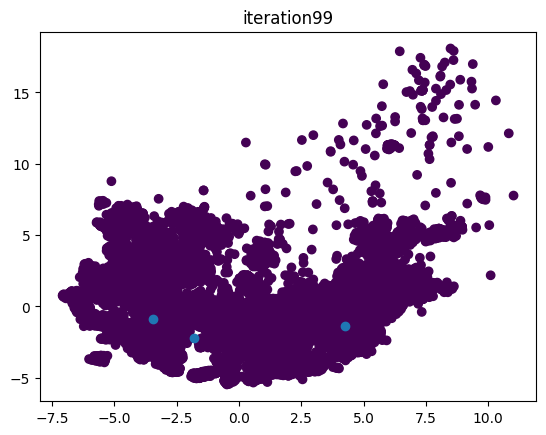

In [ ]:
max_iterations=100
k =3

centroids = random_centroids(data,k)
old_centroids =pd.DataFrame()
iteration= 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroid = centroids
  label =get_labels(data,centroids)
  centroid =new_centroids(data, label,k)
  plot_clusters(data, label, centroids, iteration)
  iteration +=1
